# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# 2. Memuat Dataset dari Hasil Clustering
# Memuat file CSV
file_path = 'clustered_data.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memahami struktur data
print(data.head())

# Pastikan untuk memeriksa kolom mana yang merupakan fitur dan label
# Misalnya, asumsikan kolom 'Cluster' adalah target/kelas
X = data.drop('Cluster', axis=1)
y = data['Cluster']

   Title  Type  Genre  Release Year  Rating  Duration  Country  Cluster
0      0     1      1     -1.458039       1        83        4        0
1   1111     1      4      1.605530       0        83        3        0
2   2222     1      0     -0.939589       6        41        7        1
3   2334     0      7      1.181344       2        83        1        1
4   2445     1      5     -1.269512       4        73        3        1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# 3. Data Splitting
# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# a. Membangun Model Klasifikasi
# Menggunakan algoritma Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Narasi: Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk melakukan klasifikasi.
# Algoritma ini bekerja dengan membagi data ke subset acak, membangun pohon keputusan pada subset tersebut,
# dan menggabungkan hasilnya untuk menghasilkan prediksi yang lebih stabil dan akurat.

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.
# Narasi: Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk melakukan klasifikasi.
# Algoritma ini bekerja dengan membagi data ke subset acak, membangun pohon keputusan pada subset tersebut,
# dan menggabungkan hasilnya untuk menghasilkan prediksi yang lebih stabil dan akurat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



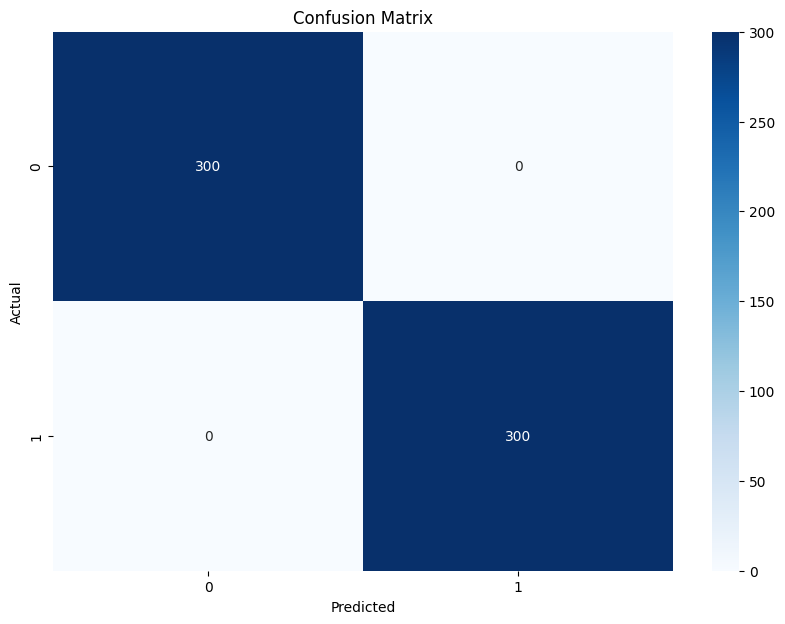

In [ ]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Menggunakan GridSearchCV untuk mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Menghitung ulang metrik evaluasi
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy:", accuracy_tuned)
print("Classification Report After Tuning:\n", classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 1.0
Classification Report After Tuning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [ ]:
# Bandingkan hasil sebelum dan sesudah tuning
print("Accuracy Improvement:", accuracy_tuned - accuracy)

# Identifikasi kelemahan model berdasarkan laporan klasifikasi
# Jika Precision atau Recall rendah, pertimbangkan untuk mengumpulkan data tambahan
# atau mencoba algoritma lain.


Accuracy Improvement: 0.0


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.